**Alumno: Marcos Amenabar**


##Introducción

El análisis de datos de pacientes en el ámbito de la salud es crucial para mejorar la calidad del servicio y optimizar los recursos médicos. Entender cómo factores como la edad, el género y las condiciones médicas influyen en los costos de facturación puede ayudar a los sistemas de salud a tomar decisiones informadas y más eficientes. En este trabajo, analizaremos un conjunto de datos de pacientes para identificar patrones en la facturación médica, la duración de la estadía hospitalaria, y las diferencias en el tratamiento según el género y la condición médica.

## Descripción del Problema

La gestión de los recursos hospitalarios y la predicción de los costos de facturación son desafíos clave para los sistemas de salud. Factores como la edad, género y las condiciones médicas de los pacientes pueden influir significativamente en los costos y la duración de las estadías hospitalarias, afectando la asignación de recursos y la planificación de servicios. En este contexto, analizar estos factores y desarrollar modelos predictivos precisos es fundamental para optimizar la eficiencia operativa y mejorar la toma de decisiones en el sector de la salud.

## Objetivo

El objetivo principal de este trabajo es construir un modelo de clasificación que permita predecir los costos hospitalarios de un paciente basado en variables como la edad, el género, y las condiciones médicas. Para lograr esto, se realizará un análisis exploratorio del conjunto de datos, con el fin de identificar patrones relevantes, y se construirán y evaluarán varios modelos de clasificación para determinar cuál ofrece el mejor rendimiento en la predicción de los costos hospitalarios.


## Fuente

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/prasad22/healthcare-dataset


Los datos utilizados en este trabajo provienen de una base hospitalaria interna, que incluye información detallada sobre los pacientes, como edad, género, condiciones médicas, y costos de tratamientos hospitalarios. Este conjunto de datos permite realizar un análisis exhaustivo sobre los factores que influyen en los costos hospitalarios, lo que facilitará la construcción de un modelo predictivo robusto para la predicción de estos costos en pacientes con diferentes características demográficas y clínicas.

# **Importación de Librerías y Carga de Datos**

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/MarcosDAmenabar/DataScience/refs/heads/main/healthcare_dataset.csv'

In [4]:
df = pd.read_csv(url)

## **Exploración de Datos**

En esta sección, exploramos el conjunto de datos para comprender sus características y distribuciones. Esto nos ayudará a identificar patrones y relaciones entre las variables.

*   Resumen Inicial: Mostrar las primeras filas del DataFrame y obtener una vista previa de los datos.
*   Estadísticas Descriptivas: Calcular estadísticas descriptivas como media, mediana, desviación estándar, etc.
*   Distribuciones: Visualizar las distribuciones de las variables numéricas y categóricas.
*   Gráficos Exploratorios: Crear gráficos como histogramas, diagramas de dispersión, y diagramas de caja para explorar los datos.



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

El conjunto de datos contiene un total de 55,500 filas (registros) y 15 columnas (variables).

No se observan valores faltantes en las columnas, ya que todas las variables tienen el mismo número de registros. Esto facilita el proceso de análisis y modelado al no requerir imputación de valores nulos.

**Variables Potencialmente Relevantes:**

Algunas variables clave que podrían ser útiles para predecir un resultado relevante en el contexto de atención médica incluyen: "Age," "Gender," "Blood Type," "Medical Condition," "Billing Amount" y "Test Results."


In [6]:
#Remplazar valores negativos por 0
df['Billing Amount'] = df['Billing Amount'].apply(lambda x: x if x >= 0 else 0)

In [7]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25540.287710,301.134829
std,19.602454,14209.678770,115.243069
min,13.000000,0.000000,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [8]:
#Separar valores por 0 y 1 para más adelante poder realizar una lógica la cual me deje añadir más datos al df.describe.
df1 = pd.get_dummies(data=df, columns=['Gender', 'Blood Type', 'Medical Condition', 'Admission Type'], drop_first=True)
df1 = df1.astype({'Billing Amount': 'float'})
df1[df1.columns.difference(['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Discharge Date', 'Medication', 'Test Results'])] = df1[df1.columns.difference(['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Discharge Date', 'Medication', 'Test Results'])].astype(int)

In [9]:
df1

,Name,Age,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Discharge Date,Medication,...,Blood Type_B-,Blood Type_O+,Blood Type_O-,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Admission Type_Emergency,Admission Type_Urgent
0,Bobby JacksOn,30,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856,328,2024-02-02,Paracetamol,...,1,0,0,0,1,0,0,0,0,1
1,LesLie TErRy,62,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643,265,2019-08-26,Ibuprofen,...,0,0,0,0,0,0,0,1,1,0
2,DaNnY sMitH,76,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955,205,2022-10-07,Aspirin,...,0,0,0,0,0,0,0,1,1,0
3,andrEw waTtS,28,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909,450,2020-12-18,Ibuprofen,...,0,1,0,0,0,1,0,0,0,0
4,adrIENNE bEll,43,2022-09-19,Kathleen Hanna,White-White,Aetna,14238,458,2022-10-09,Penicillin,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650,417,2020-09-15,Penicillin,...,0,1,0,1,0,0,0,0,0,0
55496,KYle pEREz,61,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457,316,2020-02-01,Aspirin,...,0,0,0,0,0,0,0,1,0,0
55497,HEATher WaNG,38,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620,347,2020-08-10,Ibuprofen,...,0,0,0,0,0,0,1,0,0,1
55498,JENniFER JOneS,43,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451,321,2019-05-31,Ibuprofen,...,0,0,1,0,0,0,0,0,0,0


In [10]:
df1.describe()

,Age,Billing Amount,Room Number,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Admission Type_Emergency,Admission Type_Urgent
count,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.789189,301.134829,0.500432,0.125568,0.125171,0.125135,0.125135,0.125117,0.124631,0.123910,0.165495,0.166252,0.167640,0.166577,0.166324,0.329171,0.334703
std,19.602454,14209.675223,115.243069,0.500004,0.331364,0.330916,0.330875,0.330875,0.330855,0.330303,0.329482,0.371630,0.372310,0.373549,0.372601,0.372375,0.469916,0.471891
min,13.000000,0.000000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,13240.750000,202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52.000000,25537.500000,302.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.000000,37820.000000,401.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,89.000000,52764.000000,500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Age:**

- El rango de edad en el conjunto de datos es de 13 a 89 años.
- La edad promedio es de aproximadamente 51.54 años.
- La desviación estándar es de 19.60, lo que indica una variabilidad considerable en las edades de los pacientes.
- El 25% de los registros tiene una edad de 35 años o menos, mientras que el 75% tiene 68 años o menos.

**Billing Amount:**

- El monto de facturación promedio es de aproximadamente 25,540.29.
- El monto mínimo es 0, lo que podría indicar que algunos pacientes no tienen cargos.
- El monto máximo de facturación es de 52,764.28.
- La desviación estándar es de 14,209.68, lo que sugiere una variabilidad significativa en los montos de facturación.
- El 25% de los registros tiene un monto de facturación de 13,241.22 o menos, mientras que el 75% tiene 37,820.51 o menos.

**Room Number:**

- El número de habitación tiene un rango de 101 a 500.
- El número promedio de habitación es de aproximadamente 301.13.
- La desviación estándar es de 115.24, lo que indica que los números de habitación están distribuidos de manera diversa.
- El 25% de los registros tiene un número de habitación de 202 o menos, mientras que el 75% tiene 401 o menos.


In [11]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# **Hipótesis Planteadas:**


1.   Diferencia en la Edad por Género: Existe una diferencia significativa en la edad de los pacientes entre hombres y mujeres. Se espera que, en promedio, uno de los géneros tenga una edad más alta que el otro.

2.   Relación entre el Tipo de Sangre y la Condición Médica: Hay una asociación entre el tipo de sangre de los pacientes y su condición médica. Es posible que ciertos tipos de sangre estén más relacionados con condiciones específicas.

3.   Gasto Facturado y Condiciones Médicas: El monto facturado a los pacientes varía según la condición médica diagnosticada. Se espera que las condiciones más graves generen mayores costos de tratamiento.

4.   Admisiones Programadas vs. Urgentes: Los pacientes admitidos de manera programada tienen una menor duración de estadía en comparación con aquellos admitidos de forma urgente. Esto sugiere que las admisiones programadas podrían ser menos complejas.

# **Gráfico: BoxPlot (Matplotlib):**

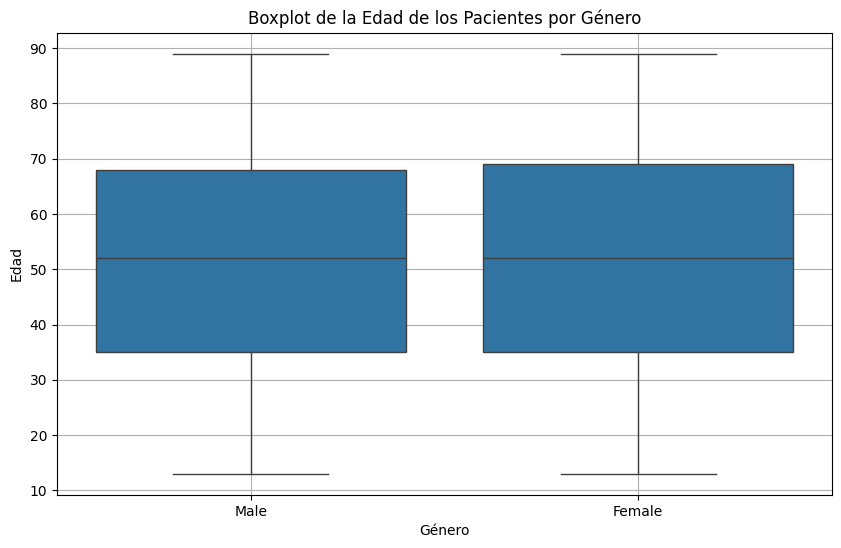

In [12]:
#boxplot de la columna 'Age'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Boxplot de la Edad de los Pacientes por Género')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.grid(True)
plt.show()

Este boxplot muestra la distribución de la edad de los pacientes según su género. No se observa una diferencia significativa en la edad entre hombres y mujeres, aunque hay cierta variabilidad en ambos grupos. Esto sugiere que, aunque las edades son similares, pueden existir factores demográficos que influyen en la atención médica.


# **Gráfico de Dispersión (Matplotlib):**

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Billing Amount', y='Age', hue='Gender', size='Medical Condition', sizes=(20, 200), data=df)
plt.title('Relación entre el Monto de Facturación y la Edad de los Pacientes')
plt.xlabel('Monto de Facturación')
plt.ylabel('Edad')
plt.grid(True)
plt.legend(title='Género', loc='upper left')
plt.show()

Este gráfico de dispersión muestra la relación entre el monto de facturación y la edad de los pacientes, diferenciando por género y tamaño de marcador según la condición médica. A través de este enfoque, se puede observar si los pacientes con ciertas condiciones médicas tienden a tener un mayor o menor monto de facturación en comparación con aquellos sin condiciones médicas. Aunque no se evidencia una relación lineal clara entre el monto facturado y la edad, esta visualización permite considerar la condición médica como un factor relevante en el análisis.

# **Gráfico de Violín (Violinplot) - Seaborn**

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Medical Condition', y='Billing Amount', data=df)
plt.title('Distribución del Monto de Facturación según Condición Médica')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Este gráfico permite visualizar cómo se distribuyen los montos de facturación para diferentes condiciones médicas. Ayuda a identificar si hay condiciones que tienden a tener costos más altos o bajos.

# **Gráfico de Relación (Pairplot) - Seaborn**

In [ ]:
sns.pairplot(df, hue='Gender', vars=['Age', 'Billing Amount'], diag_kind='kde')
plt.suptitle('Relaciones entre Edad y Monto de Facturación', y=1.02)
plt.grid(True)
plt.show()

Este gráfico muestra la relación entre la edad y el monto de facturación, separando por género. Ayuda a visualizar si hay patrones o tendencias en cómo la edad puede afectar los costos médicos.

# **Gráfico de Caja (Boxplot) con el Género como variable de color - Seaborn**

In [ ]:
sns.pairplot(df, hue='Gender')
plt.suptitle('Gráfico de Pares: Relaciones entre Variables', y=1.02)
plt.show()


Este boxplot muestra la distribución del monto de facturación dividido por género, permitiendo observar si hay diferencias significativas entre hombres y mujeres en cuanto a los costos médicos.

# **Gráfico de Líneas (Matplotlib)**

In [ ]:
# Asegurémonos de que la columna de fechas esté en el formato adecuado
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

# Agrupamos por fecha y calculamos la suma del monto facturado
billing_by_date = df.groupby('Date of Admission')['Billing Amount'].sum()

plt.figure(figsize=(12, 6))
plt.plot(billing_by_date.index, billing_by_date, marker='o', linestyle='-')
plt.title('Total de Monto Facturado a lo largo del Tiempo')
plt.xlabel('Fecha de Admisión')
plt.ylabel('Monto Facturado')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Este gráfico de líneas muestra cómo varía el monto total facturado a lo largo del tiempo en función de las fechas de admisión. Es útil para identificar tendencias, como picos de facturación en ciertos períodos. La representación puede ayudar a analizar el impacto de eventos específicos o cambios en la atención médica sobre la facturación.


# **Grafico de Líneas 2.**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar los datos por edad y calcular la suma del monto facturado
grouped_data = df.groupby('Age')['Billing Amount'].sum()

# Crear un DataFrame para los montos totales
billing_df = pd.DataFrame({'Age': grouped_data.index, 'Total Billing Amount': grouped_data.values})

# Ordenar los datos por edad
billing_df.sort_values('Age', inplace=True)

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(billing_df['Age'], billing_df['Total Billing Amount'], marker='o', linestyle='--')
plt.xlabel('Edad')
plt.ylabel('Monto Total Facturado')
plt.title('Monto Total Facturado vs. Edad de los Pacientes')
plt.grid(True)

plt.show()


Este gráfico de líneas muestra la relación entre la edad de los pacientes y el monto total facturado por su atención médica. A medida que aumenta la edad, el monto total facturado también tiende a aumentar, lo que puede indicar que los pacientes mayores requieren más atención médica y, por lo tanto, generan costos más altos. Este análisis puede ser útil para entender las necesidades de atención médica en diferentes grupos etarios y planificar recursos adecuadamente.

# **Gráfico de Barras (Distribución de Pacientes por Género y Condición Médica):**


In [ ]:
# Filtrar los datos por género
filtered_df = df[df['Gender'].isin(['Male', 'Female'])]

# Calcular los conteos por género y condición médica
medical_condition_counts = filtered_df.groupby(['Gender', 'Medical Condition']).size().unstack(fill_value=0)

# Crear el gráfico de barras
medical_condition_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=['lightblue', 'lightcoral'])

# Configurar el gráfico
plt.title('Distribución de Pacientes por Género y Condición Médica')
plt.xlabel('Género')
plt.ylabel('Cantidad de Pacientes')
plt.xticks(rotation=0)
plt.legend(title='Condición Médica', loc='upper right')

# Mostrar el gráfico
plt.show()


El gráfico muestra la distribución de pacientes por género y condición médica. Se observa que, tanto entre hombres como mujeres, la cantidad de pacientes con y sin condición médica presenta diferencias notables. Las barras celestes representan a los hombres, mientras que las rosas representan a las mujeres. Esta visualización permite identificar rápidamente las tendencias en la prevalencia de condiciones médicas según el género, facilitando la comprensión de cómo varían estas condiciones en la población analizada.